## Logistic Population Differential Equations


In this notebook we will model non-linear logistic population growth [1] and interact with the parameters of the space.

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
# @title Figure Settings
import IPython.display as ipd
from matplotlib import gridspec

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'

# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

## Logistic Population Equation
The logistic growth differential equation is a non-linear first order differential equation
\begin{equation}
\frac{d p}{dt}=\alpha_{Birth} p-\alpha_{Death} p^2
\end{equation}
for $a\leq t \leq b$ years, where $\alpha_{Birth}$ is the birth rate and $\alpha_{Death}$ is the death rate, with the initial condition
$$ p(a)=A. $$
As the equation is non-linear we must numverically approximate the solution.
In this simulation we set the parameters of the different equations:
*  as $\alpha_{Birth}=0.3$ and $\alpha_{Death}=0.01$, with the inital condition $p(0)=3$, over the time period $0\leq t \leq 20$.

## Discrete Domain 
To numerically approximate the solution we discretise the continuous domain using a step size, $h=1$, 
which gives
\begin{equation}
t_i=0+i h,
\end{equation}
for $i=0,...20$.
The figure below illustrate the discrete domain.

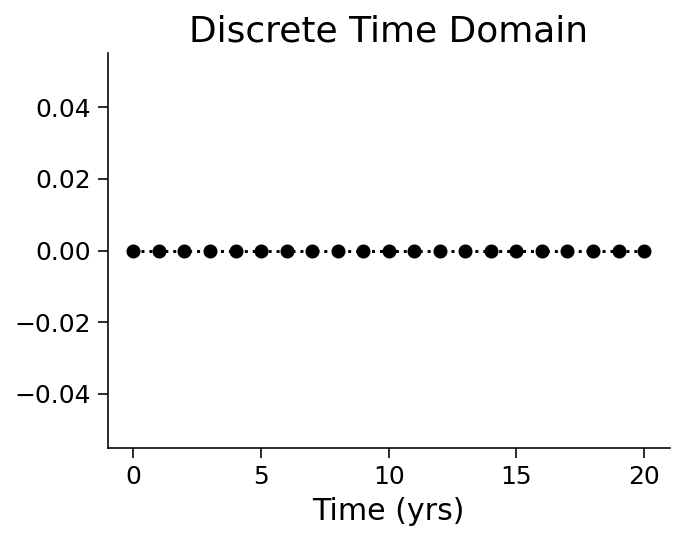

In [3]:
h=1
a=0
b=20
t=np.arange(a,b+h/2,h)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

In [4]:
N=int((b-a)/h) # Number of Steps
P=np.zeros(N+1) # Numerical Solution P
P[0]=3


We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
\frac{P_{i+1}-P_i}{h}=\alpha_{Birth}P_i-\alpha_{Death}P_i^2
\end{equation}
re-arranging
\begin{equation}
\color{red}{P_{i+1}}=\color{green}{P_i}+h\big(\alpha_{Birth}\color{green}{P_i}-\alpha_{Death}\color{green}{P_i^2}\big)
\end{equation}

where $h$ is the stepsize and where $P_i$ is the numerical approximation of $p(t_i)$ at time $t_i$, for $i=0,...,10$


In [12]:
def Logistic_Pop(alpha_Birth,alpha_Death):
    """
    Args:
      alpha_Birth  : Birth Rate
      alpha_Death : Death Rate

    """
    h=1 # step-size
    a=0 # start time
    b=20 # end time
    t=np.arange(a,b+h/2,h)
    N=int((b-a)/h) # Number of Steps
    P=np.zeros(N+1) # Numerical Solution P
    P[0]=3


    for i in range (0,N):
        # Numerical Solution
        P[i+1]=P[i]+h*(alpha_Birth*P[i]-alpha_Death*P[i]*P[i])

    ## Plotting Figure
    fig = plt.figure(1,figsize=(6,6))

    ax = fig.add_subplot(1,1,1)

    ax.plot(t,P,'o:',color='red',label='Population')
    ax.legend()
    ax.set_xlabel('Time (yrs)')
    ax.set_ylabel('Population (billions)')
    ax.set_title('Numerical Solution, P')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()



## Results
The plot bellow shows the Numerical solution $P_i$ of the Logistic Population as a function of time $t$.

In [13]:
my_layout.width = '450px'
@widgets.interact(
    alpha_B=widgets.FloatSlider(.3, min=0., max=1., step=.01, layout=my_layout),
    alpha_D=widgets.FloatSlider(.01, min=0.00, max=0.5, step=.01, layout=my_layout)
)
def Pop_widget(alpha_B,alpha_D):
  Logistic_Pop(alpha_Birth=alpha_B,alpha_Death=alpha_D)
  plt.show()

interactive(children=(FloatSlider(value=0.3, description='alpha_B', layout=Layout(width='450px'), max=1.0, ste…

# References

[1] Stover, Christopher and Weisstein, Eric W. "Population Growth." From MathWorld--A Wolfram Web Resource. http://mathworld.wolfram.com/PopulationGrowth.html

[2]  Vito Volterra.  Fluctuations in the abundance of a species considered mathematically. Nature,118:558–560,1926.

[3] Alfred J Lotka.   Analytical note on certain rhythmic  relations inorganic  systems.Proceedings of the National Academy of Sciences,6(7):410–415,1920.